In [3]:
import os
import numpy as np
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
import pandas as pd

In [4]:
df = pd.read_csv('../../data/results/cd_vs_powell.csv')
df

,Architecture,Bits weights,Bits act,max,max.cd(1),max.cd(2),max.powell,l2,l2.cd(1),l2.cd(2),l2.powell,laplace,laplace.cd(1),laplace.cd(2),laplace.powell,l3,l3.cd(1),l3.cd(2),l3.powell,fp32
0,Resnet18,32,4,57.80%,68.10%,68.10%,62.80%,68.10%,67.70%,68.20%,68.30%,68.40%,67.80%,68.00%,68.60%,68.50%,68.40%,68.10%,68.90%,69.75%
1,Resnet18,32,3,4.20%,58.50%,64.00%,18.10%,63.30%,64.90%,65.10%,65.20%,64.90%,65.60%,65.80%,65.40%,65.80%,64.80%,65.30%,66.10%,69.75%
2,Resnet18,32,2,0.10%,0.10%,0.10%,0.10%,33.00%,46.90%,50.10%,51.10%,23.00%,45.10%,44.80%,51.40%,47.60%,52.10%,51.00%,51.20%,69.75%
3,Resnet18,4,32,1.70%,55.50%,58.20%,55.00%,48.60%,54.50%,59.10%,61.30%,42.40%,53.70%,57.40%,59.80%,57.20%,59.00%,58.70%,62.10%,69.75%
4,Resnet18,3,32,0.10%,0.10%,0.10%,0.10%,4.00%,30.00%,0.00%,43.70%,9.00%,9.00%,0.00%,42.40%,19.80%,0.30%,0.10%,43.30%,69.75%
5,Resnet18,4,4,0.50%,51.30%,54.00%,37.20%,43.60%,54.10%,57.70%,57.00%,40.10%,45.20%,49.70%,56.90%,55.40%,54.60%,56.20%,57.30%,69.75%


In [5]:
font = {'weight' : 'normal', 'size'   : 20, 'weight': 'bold'}
matplotlib.rc('font', **font)

def tofloat(s):
    # assume s is string in format dd.dd%
    return float(s.replace('%', ''))

tofloat('33.12%')

33.12

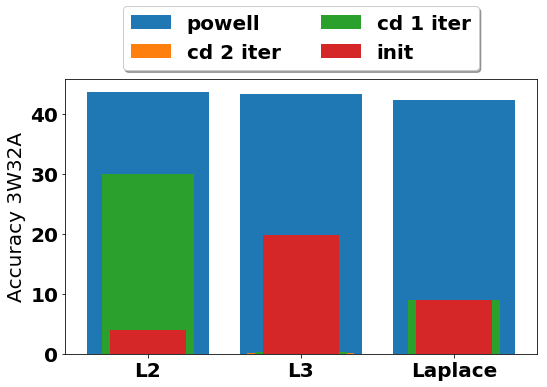

In [16]:
rcParams['figure.figsize'] = 8, 6
font = {'weight' : 'normal', 'size'   : 20, 'weight': 'bold'}
matplotlib.rc('font', **font)

bits_w = 3
bits_a = 32
groups = ['L2', 'L3', 'Laplace']
ind = np.arange(len(groups))
init_names = ['l2', 'l3', 'laplace']
init = [tofloat((df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)][n]).item()) for n in init_names]
cd1 = [tofloat(df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)][n+'.cd(1)'].item()) for n in init_names]
cd2 = [tofloat(df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)][n+'.cd(2)'].item()) for n in init_names]
powell = [tofloat(df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)][n+'.powell'].item()) for n in init_names]

plt.bar(ind, powell, width=0.8)
plt.bar(ind, cd2, width=0.7)
plt.bar(ind, cd1, width=0.6)
plt.bar(ind, init, width=0.5)

plt.ylabel('Accuracy {}W{}A'.format(bits_w, bits_a))
plt.legend(['powell', 'cd 2 iter', 'cd 1 iter', 'init'], loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=2, fancybox=True, shadow=True)
plt.xticks(ind, groups);
plt.tight_layout()
plt.savefig('../../fig/cd_vs_powell_{}W{}A.png'.format(bits_w, bits_a))

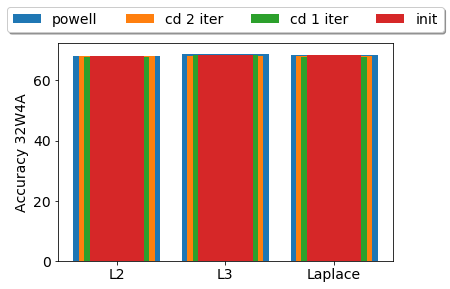

In [130]:
bits_w = 32
bits_a = 4
groups = ['L2', 'L3', 'Laplace']
ind = np.arange(len(groups))
init_names = ['l2', 'l3', 'laplace']
init = [tofloat((df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)][n]).item()) for n in init_names]
cd1 = [tofloat(df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)][n+'.cd(1)'].item()) for n in init_names]
cd2 = [tofloat(df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)][n+'.cd(2)'].item()) for n in init_names]
powell = [tofloat(df[(df['Bits weights'] == bits_w) & (df['Bits act'] == bits_a)][n+'.powell'].item()) for n in init_names]

plt.bar(ind, powell, width=0.8)
plt.bar(ind, cd2, width=0.7)
plt.bar(ind, cd1, width=0.6)
plt.bar(ind, init, width=0.5)

plt.ylabel('Accuracy {}W{}A'.format(bits_w, bits_a))
plt.legend(['powell', 'cd 2 iter', 'cd 1 iter', 'init'], loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=4, fancybox=True, shadow=True)
plt.xticks(ind, groups);